In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# data_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\monkey_dataset\\Irina_data\\'
# results_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\'

data_folder = 'E:\\projects_q_30_10_2024\\isttc\\monkey_dataset\\Irina_data\\'
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\'

In [71]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'
save_fig = True

### Load data

In [3]:
with open(data_folder + 'data_PFdl_fixON.pkl', 'rb') as f:
    data_PFdl_fix_on = pickle.load(f)

with open(data_folder + 'data_PFdl_cueON.pkl', 'rb') as f:
    data_PFdl_cue_on = pickle.load(f)

with open(data_folder + 'data_PFdl_delayON.pkl', 'rb') as f:
    data_PFdl_delay_on = pickle.load(f)

with open(data_folder + 'data_PFdl_rewardON.pkl', 'rb') as f:
    data_PFdl_reward_on = pickle.load(f)

print('N neurons in PFdl fixON {}'.format(len(data_PFdl_fix_on)))
print('N neurons in PFdl cueON {}'.format(len(data_PFdl_cue_on)))
print('N neurons in PFdl delayON {}'.format(len(data_PFdl_delay_on)))
print('N neurons in PFdl rewardON {}'.format(len(data_PFdl_reward_on)))

N neurons in PFdl fixON 544
N neurons in PFdl cueON 544
N neurons in PFdl delayON 544
N neurons in PFdl rewardON 544


In [4]:
with open(data_folder + 'data_PFp_fixON.pkl', 'rb') as f:
    data_PFp_fix_on = pickle.load(f)

with open(data_folder + 'data_PFp_cueON.pkl', 'rb') as f:
    data_PFp_cue_on = pickle.load(f)

with open(data_folder + 'data_PFp_delayON.pkl', 'rb') as f:
    data_PFp_delay_on = pickle.load(f)

with open(data_folder + 'data_PFp_rewardON.pkl', 'rb') as f:
    data_PFp_reward_on = pickle.load(f)

print('N neurons in PFp fixON {}'.format(len(data_PFp_fix_on)))
print('N neurons in PFp cueON {}'.format(len(data_PFp_cue_on)))
print('N neurons in PFp delayON {}'.format(len(data_PFp_delay_on)))
print('N neurons in PFp rewardON {}'.format(len(data_PFp_reward_on)))

N neurons in PFp fixON 543
N neurons in PFp cueON 543
N neurons in PFp delayON 543
N neurons in PFp rewardON 543


### Plot rasters per neuron 

#### Plot one neuron from 4 lists

In [5]:
def get_trials_for_condition(unit_all_trial, condition_id, start_trial_idx):
    condition = unit_all_trial[condition_id-1]
    print('N trials in condition {}: {}'.format(condition_id, len(condition)))
    
    spike_times_l = []
    trial_n_l = []
    for idx, trial in enumerate(condition):
        spike_times = trial[0]
        # n_spikes = len(spike_times)
        if type(spike_times) == np.ndarray:
            n_spikes = len(spike_times)
        else:
            n_spikes = 1
        # print(n_spikes)
        spike_times_l.append(spike_times)
        trial_n_l.append((idx+start_trial_idx)*np.ones(n_spikes))
        
    spike_times_flat_l = []
    for row in spike_times_l:
        if type(row) != np.ndarray:
            row = np.expand_dims(row, axis=0)
        spike_times_flat_l.extend(row)
    
    trial_n_flat_l = []
    for row in trial_n_l:
        trial_n_flat_l.extend(row)
        
    return spike_times_flat_l, trial_n_flat_l, len(condition) + start_trial_idx

def get_trials_for_all_conditions(unit_all_trial):
    spikes_trails_dict = {}

    n_trials_idx = 1
    for condition in range(8):
        spike_times_flat_l, trial_n_flat_l, n_trials = get_trials_for_condition(unit_all_trial, condition+1, n_trials_idx)
        spikes_trails_dict[condition+1] = {'spike_times_flat_l': spike_times_flat_l, 'trial_n_flat_l': trial_n_flat_l}
        n_trials_idx = n_trials

    return spikes_trails_dict

In [6]:
n_neuron = 1

# fix_on
unit1_fix_on = data_PFdl_fix_on[n_neuron]
print('N task conditions unit1_fix_on {}'.format(len(unit1_fix_on)))

# for every task condition - n trials
n_trials_all_conditions = 0
for i in range(len(unit1_fix_on)):
    print('N trials for task conditions {}: {}'.format(i+1, len(unit1_fix_on[i])))
    n_trials_all_conditions = n_trials_all_conditions + len(unit1_fix_on[i])

print('Total number of trials {}'.format(n_trials_all_conditions))
spikes_trial_unit1_fixon = get_trials_for_all_conditions(unit1_fix_on)

# cue_on
unit1_cue_on = data_PFdl_cue_on[n_neuron]
print('N task conditions unit1_cue_on {}'.format(len(unit1_cue_on)))

# for every task condition - n trials
n_trials_all_conditions_cue_on = 0
for i in range(len(unit1_cue_on)):
    print('N trials for task conditions {}: {}'.format(i+1, len(unit1_cue_on[i])))
    n_trials_all_conditions_cue_on = n_trials_all_conditions_cue_on + len(unit1_cue_on[i])

print('Total number of trials {}'.format(n_trials_all_conditions_cue_on))
spikes_trial_unit1_cueon = get_trials_for_all_conditions(unit1_cue_on)

# delay_on
unit1_delay_on = data_PFdl_delay_on[n_neuron]
print('N task conditions unit1_delay_on {}'.format(len(unit1_delay_on)))

# for every task condition - n trials
n_trials_all_conditions_delay_on = 0
for i in range(len(unit1_delay_on)):
    print('N trials for task conditions {}: {}'.format(i+1, len(unit1_delay_on[i])))
    n_trials_all_conditions_delay_on = n_trials_all_conditions_delay_on + len(unit1_delay_on[i])

print('Total number of trials {}'.format(n_trials_all_conditions_delay_on))
spikes_trial_unit1_delayon = get_trials_for_all_conditions(unit1_delay_on)

# reward_on
unit1_reward_on = data_PFdl_reward_on[n_neuron]
print('N task conditions unit1_delay_on {}'.format(len(unit1_reward_on)))

# for every task condition - n trials
n_trials_all_conditions_reward_on = 0
for i in range(len(unit1_reward_on)):
    print('N trials for task conditions {}: {}'.format(i+1, len(unit1_reward_on[i])))
    n_trials_all_conditions_reward_on = n_trials_all_conditions_reward_on + len(unit1_reward_on[i])

print('Total number of trials {}'.format(n_trials_all_conditions_reward_on))
spikes_trial_unit1_rewardon = get_trials_for_all_conditions(unit1_reward_on)

N task conditions unit1_fix_on 8
N trials for task conditions 1: 8
N trials for task conditions 2: 11
N trials for task conditions 3: 11
N trials for task conditions 4: 11
N trials for task conditions 5: 12
N trials for task conditions 6: 12
N trials for task conditions 7: 15
N trials for task conditions 8: 12
Total number of trials 92
N trials in condition 1: 8
N trials in condition 2: 11
N trials in condition 3: 11
N trials in condition 4: 11
N trials in condition 5: 12
N trials in condition 6: 12
N trials in condition 7: 15
N trials in condition 8: 12
N task conditions unit1_cue_on 8
N trials for task conditions 1: 8
N trials for task conditions 2: 11
N trials for task conditions 3: 11
N trials for task conditions 4: 11
N trials for task conditions 5: 12
N trials for task conditions 6: 12
N trials for task conditions 7: 15
N trials for task conditions 8: 12
Total number of trials 92
N trials in condition 1: 8
N trials in condition 2: 11
N trials in condition 3: 11
N trials in condit

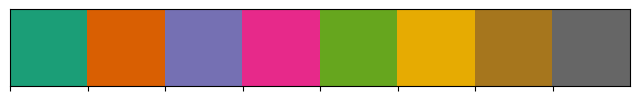

In [7]:
colors_per_condition = sns.color_palette("Dark2", 8)
sns.palplot(colors_per_condition)

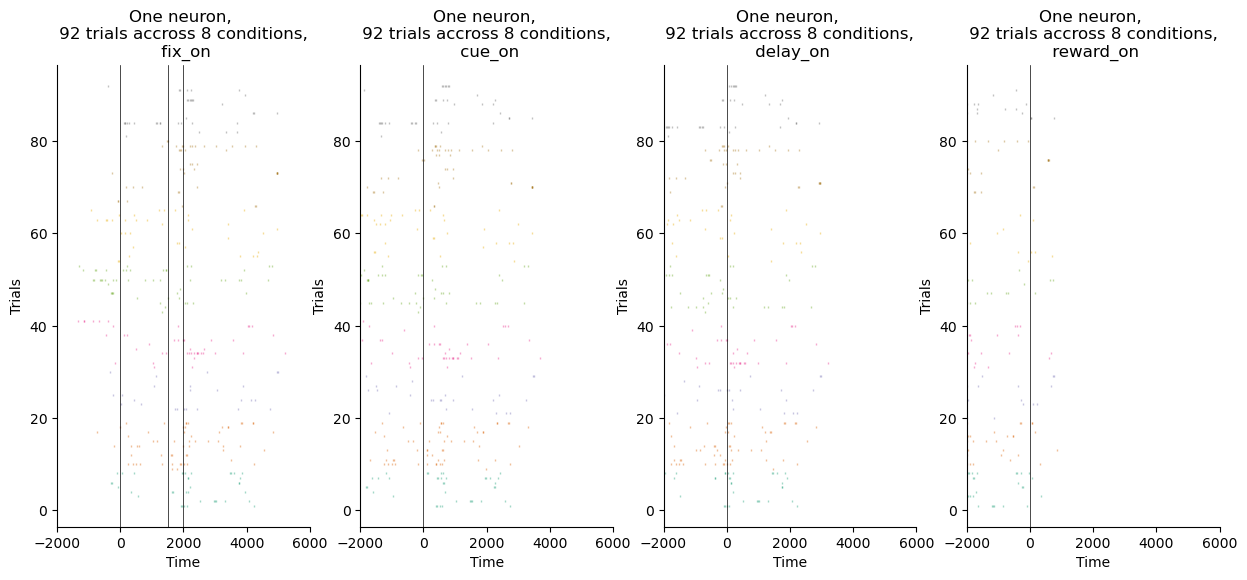

In [8]:
# plot
fig, axes = plt.subplots(1, 4, figsize=(15,6))

for k,v in spikes_trial_unit1_fixon.items():
    axes[0].plot(v['spike_times_flat_l'], v['trial_n_flat_l'], '|', markersize=2, alpha=0.4, color=colors_per_condition[k-1])
axes[0].axvline(x=1500, lw=0.5, color='k')
axes[0].axvline(x=2000, lw=0.5, color='k')
axes[0].set_title('One neuron, \n {} trials accross 8 conditions, \n fix_on'.format(n_trials_all_conditions))

for k,v in spikes_trial_unit1_cueon.items():
    axes[1].plot(v['spike_times_flat_l'], v['trial_n_flat_l'], '|', markersize=2, alpha=0.4, color=colors_per_condition[k-1])
# axes[1].axvline(x=500, lw=0.5, color='k')
# axes[1].axvline(x=-1500, lw=0.5, color='k')
axes[1].set_title('One neuron, \n {} trials accross 8 conditions, \n cue_on'.format(n_trials_all_conditions_cue_on))

for k,v in spikes_trial_unit1_delayon.items():
    axes[2].plot(v['spike_times_flat_l'], v['trial_n_flat_l'], '|', markersize=2, alpha=0.4, color=colors_per_condition[k-1])
# axes[2].axvline(x=-500, lw=0.5, color='k')
# axes[2].axvline(x=-2000, lw=0.5, color='k')
axes[2].set_title('One neuron, \n {} trials accross 8 conditions, \n delay_on'.format(n_trials_all_conditions_cue_on))

for k,v in spikes_trial_unit1_rewardon.items():
    axes[3].plot(v['spike_times_flat_l'], v['trial_n_flat_l'], '|', markersize=2, alpha=0.4, color=colors_per_condition[k-1])
# axes[3].axvline(x=-1500, lw=0.5, color='k')
# axes[3].axvline(x=-2000, lw=0.5, color='k')
# axes[3].axvline(x=-4000, lw=0.5, color='k')
axes[3].set_title('One neuron, \n {} trials accross 8 conditions, \n reward_on'.format(n_trials_all_conditions_reward_on))

for ax in axes.flat:
    ax.axvline(x=0, lw=0.5, color='k')
    ax.set_xlabel('Time')
    ax.set_ylabel('Trials')
    ax.set_xlim(left=-2000, right=6000)

sns.despine()

#### Plot and save raster for every neuron in fix_on 

(4 lists contain the same data, th eonly difference is in alignment to 0)

In [ ]:
n_units = len(data_PFdl_fix_on)

for n_unit in range(n_units):
    unit_ = data_PFdl_fix_on[n_unit]
    #print('N task conditions unit1_fix_on {}'.format(len(unit1_fix_on)))

    # for every task condition - n trials
    n_trials_all_conditions = 0
    for i in range(len(unit_)):
        # print('N trials for task conditions {}: {}'.format(i+1, len(unit_[i])))
        n_trials_all_conditions = n_trials_all_conditions + len(unit_[i])
    
    print('Total number of trials {}'.format(n_trials_all_conditions))
    spikes_trial_unit_ = get_trials_for_all_conditions(unit_)

    # plot
    fig, axes = plt.subplots(1, 1, figsize=(20,20))
    
    for k,v in spikes_trial_unit_.items():
        axes.plot(v['spike_times_flat_l'], v['trial_n_flat_l'], '|', markersize=4, alpha=0.6, color=colors_per_condition[k-1])
    axes.axvline(x=1500, lw=0.5, color='k')
    axes.axvline(x=2000, lw=0.5, color='k')
    axes.set_title('Neuron {}, {} trials, color-coded conditions, fix_on'.format(n_unit, n_trials_all_conditions))
    
    axes.axvline(x=0, lw=0.5, color='k')
    axes.set_xlabel('Time (ms)')
    axes.set_ylabel('Trials')
    axes.set_xlim(left=-2000, right=6000)
    
    sns.despine()
    
    fig.savefig(results_folder + 'rasters\\pfdl_fix_on_xlim\\unit_' + str(n_unit) + '.png', bbox_inches='tight')

In [ ]:
n_units = len(data_PFp_fix_on)

for n_unit in range(n_units):
    unit_ = data_PFp_fix_on[n_unit]
    #print('N task conditions unit1_fix_on {}'.format(len(unit1_fix_on)))

    # for every task condition - n trials
    n_trials_all_conditions = 0
    for i in range(len(unit_)):
        # print('N trials for task conditions {}: {}'.format(i+1, len(unit_[i])))
        n_trials_all_conditions = n_trials_all_conditions + len(unit_[i])
    
    print('Total number of trials {}'.format(n_trials_all_conditions))
    spikes_trial_unit_ = get_trials_for_all_conditions(unit_)

    # plot
    fig, axes = plt.subplots(1, 1, figsize=(20,20))
    
    for k,v in spikes_trial_unit_.items():
        axes.plot(v['spike_times_flat_l'], v['trial_n_flat_l'], '|', markersize=4, alpha=0.6, color=colors_per_condition[k-1])
    axes.axvline(x=1500, lw=0.5, color='k')
    axes.axvline(x=2000, lw=0.5, color='k')
    axes.set_title('Neuron {}, {} trials, color-coded conditions, fix_on'.format(n_unit, n_trials_all_conditions))
    
    axes.axvline(x=0, lw=0.5, color='k')
    axes.set_xlabel('Time (ms)')
    axes.set_ylabel('Trials')
    axes.set_xlim(left=-2000, right=6000)
    
    sns.despine()
    
    fig.savefig(results_folder + 'rasters\\pfp_fix_on_xlim\\unit_' + str(n_unit) + '.png', bbox_inches='tight')

### Deal with out of range spikes

based on raster it is quite a lot of neurons in both PFdl and PFp with this problem, solution is just to remove such spikes

todo!

now just use xlim for plots and will use specific periods for calc

In [ ]:
# test = data_PFdl_fix_on[1]
# n_trials_all_conditions = 0
# for i in range(len(test)):
#     # print('N trials for task conditions {}: {}'.format(i+1, len(unit_[i])))
#     n_trials_all_conditions = n_trials_all_conditions + len(test[i])

# print('Total number of trials {}'.format(n_trials_all_conditions))
# spikes_trial_unit_ = get_trials_for_all_conditions(test)
# spikes_trial_unit_

In [ ]:
# condition = test[2]
# condition

### Plot number of trials per neuron and number of neurons


In [9]:
def get_n_trials_per_neuron(unit_all_trial, n_neuron):
    n_trials_all_conditions = 0
    for i in range(len(unit_all_trial[n_neuron])):
        # print('N trials for task conditions {}: {}'.format(i+1, len(unit_all_trial[n_neuron][i])))
        n_trials_all_conditions = n_trials_all_conditions + len(unit_all_trial[n_neuron][i])
    return n_trials_all_conditions

In [10]:
n_trials_per_neuron_pfdl_fix_on_l = []
for i in range(len(data_PFdl_fix_on)):
    n_trails = get_n_trials_per_neuron(data_PFdl_fix_on, i)
    n_trials_per_neuron_pfdl_fix_on_l.append(n_trails)

pfdl_summary_df = pd.DataFrame(n_trials_per_neuron_pfdl_fix_on_l, columns=['n_trials'])
pfdl_summary_df.reset_index(inplace=True, drop=False) 
pfdl_summary_df.rename(columns = {'index':'unit_id'}, inplace=True)
pfdl_summary_df

In [11]:
n_trials_per_neuron_pfp_fix_on_l = []
for i in range(len(data_PFp_fix_on)):
    n_trails = get_n_trials_per_neuron(data_PFp_fix_on, i)
    n_trials_per_neuron_pfp_fix_on_l.append(n_trails)

pfp_summary_df = pd.DataFrame(n_trials_per_neuron_pfp_fix_on_l, columns=['n_trials'])
pfp_summary_df.reset_index(inplace=True, drop=False) 
pfp_summary_df.rename(columns = {'index':'unit_id'}, inplace=True)
pfp_summary_df

In [30]:
pfp_summary_df.describe()

,unit_id,n_trials
count,543.000000,543.000000
mean,271.000000,80.436464
std,156.894869,28.856099
min,0.000000,18.000000
25%,135.500000,61.000000
50%,271.000000,83.000000
75%,406.500000,96.000000
max,542.000000,194.000000


In [54]:
all_areas_n_units_df = pd.DataFrame(np.vstack((['pfdl', 'pfp'], [len(pfdl_summary_df), len(pfp_summary_df)])).T, 
                                   columns=['area', 'n_units'])
all_areas_n_units_df['n_units'] = all_areas_n_units_df['n_units'].astype(int)

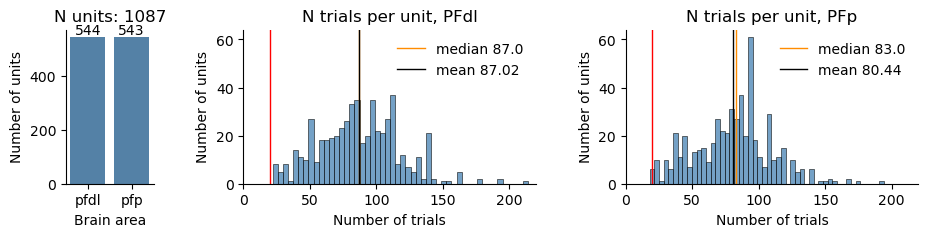

In [76]:
# plot
fig, axes = plt.subplots(1, 3, figsize=(11,2), gridspec_kw={'width_ratios': [0.6, 2, 2]})
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(ax=axes[0], x='area', y='n_units', data=all_areas_n_units_df, color='steelblue')
axes[0].bar_label(axes[0].containers[0], fmt='%.0f')
axes[0].set_xlabel('Brain area')
axes[0].set_ylabel('Number of units')

sns.histplot(ax=axes[1], x='n_trials', data=pfdl_summary_df, bins=50, stat='count', color='steelblue')
sns.histplot(ax=axes[2], x='n_trials', data=pfp_summary_df, bins=50, stat='count', color='steelblue')

axes[1].sharey(axes[2])

axes[0].set_title('N units: {}'.format(len(pfdl_summary_df) + len(pfp_summary_df)))
axes[1].set_title('N trials per unit, PFdl')
axes[2].set_title('N trials per unit, PFp')

axes[1].axvline(x=np.nanmedian(pfdl_summary_df['n_trials'].values), lw=1, color='darkorange', 
                label='median ' + str(np.round(np.nanmedian(pfdl_summary_df['n_trials'].values), 2)))
axes[2].axvline(x=np.nanmedian(pfp_summary_df['n_trials'].values), lw=1, color='darkorange', 
                label='median ' + str(np.round(np.nanmedian(pfp_summary_df['n_trials'].values), 2)))

axes[1].axvline(x=np.nanmean(pfdl_summary_df['n_trials'].values), lw=1, color='black', label='mean ' 
                + str(np.round(np.nanmean(pfdl_summary_df['n_trials'].values), 2)))
axes[2].axvline(x=np.nanmean(pfp_summary_df['n_trials'].values), lw=1, color='black', label='mean ' 
                + str(np.round(np.nanmean(pfp_summary_df['n_trials'].values), 2)))

for ax in axes.flat[1:]:
    ax.set_xlabel('Number of trials')
    ax.set_ylabel('Number of units')
    ax.axvline(x=20, lw=1, color='red')
    ax.set_xlim([0, 220])
    ax.legend(frameon=False)

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'dataset_unit_trials_count.png' , bbox_inches='tight')
    plt.savefig(fig_folder + 'dataset_unit_trials_count.svg' , bbox_inches='tight')

In [19]:
pfdl_summary_df.to_pickle(results_folder + 'pfdl_n_trials_per_unit_df')
pfp_summary_df.to_pickle(results_folder + 'pfp_n_trials_per_unit_df')